# Proyek Akhir : Sistem Rekomendasi Anime 

Nama : Dico Aji Prasetyo

Kelas : M02

In [3]:
import pandas as pd
import numpy as np

anime = pd.read_csv('anime.csv')
#rating = pd.read_csv('rating.csv')

In [4]:
anime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


In [5]:
anime.isnull().sum()

anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64

In [6]:
anime.groupby('anime_id').sum()

,rating,members
anime_id,,
1,8.82,486824
5,8.40,137636
6,8.32,283069
7,7.36,64905
8,7.06,9848
...,...,...
34514,7.21,295
34519,5.67,94
34522,0.00,381


Mengatasi Missing Value


In [7]:
anime.isnull().sum()

anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64

In [8]:
anime['rating'] = anime['rating'].fillna((anime['rating'].mean()))
anime.isna().sum()

anime_id     0
name         0
genre       62
type        25
episodes     0
rating       0
members      0
dtype: int64

In [9]:
anime.dropna(axis=0, how='all')  
anime.isnull().sum()

anime_id     0
name         0
genre       62
type        25
episodes     0
rating       0
members      0
dtype: int64

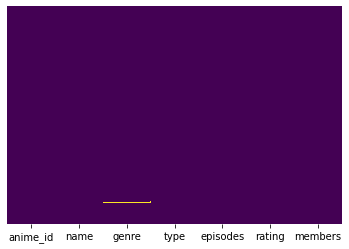

In [10]:
import seaborn as sns
sns.heatmap(anime.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [11]:
anime = anime.dropna()

In [12]:
anime.isnull().sum()

anime_id    0
name        0
genre       0
type        0
episodes    0
rating      0
members     0
dtype: int64

Mengubah karakter (,) menjadi karakter (|) pada kolom genre

In [13]:
anime['genre'] = anime['genre'].str.replace(',',' | ')
anime

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,Drama | Romance | School | Supernatural,Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,Action | Adventure | Drama | Fantasy | Mag...,TV,64,9.26,793665
2,28977,Gintama°,Action | Comedy | Historical | Parody | Sa...,TV,51,9.25,114262
3,9253,Steins;Gate,Sci-Fi | Thriller,TV,24,9.17,673572
4,9969,Gintama&#039;,Action | Comedy | Historical | Parody | Sa...,TV,51,9.16,151266
...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211
12290,5543,Under World,Hentai,OVA,1,4.28,183
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175


Mengurutkan anime berdasarkan anime_id kemudian memasukkannya ke dalam variabel fix_anime

In [14]:
fix_anime = anime.sort_values('anime_id', ascending=True)
fix_anime

,anime_id,name,genre,type,episodes,rating,members
22,1,Cowboy Bebop,Action | Adventure | Comedy | Drama | Sci-...,TV,26,8.820000,486824
152,5,Cowboy Bebop: Tengoku no Tobira,Action | Drama | Mystery | Sci-Fi | Space,Movie,1,8.400000,137636
214,6,Trigun,Action | Comedy | Sci-Fi,TV,26,8.320000,283069
2095,7,Witch Hunter Robin,Action | Drama | Magic | Mystery | Police ...,TV,26,7.360000,64905
3159,8,Beet the Vandel Buster,Adventure | Fantasy | Shounen | Supernatural,TV,52,7.060000,9848
...,...,...,...,...,...,...,...
2726,34514,Pokemon Generations,Action | Adventure | Fantasy | Game | Kids,ONA,18,7.210000,295
9586,34519,Mobile Suit Gakuen: G-Reco Koushien,Comedy,Special,9,5.670000,94
11104,34522,"Wake Up, Girls! Shin Shou",Drama | Music,TV,Unknown,6.473902,381
10952,34525,Centaur no Nayami,Comedy | Fantasy | Slice of Life | Supernat...,TV,Unknown,6.473902,108


Mengecek berapa jumlah fix_anime

In [15]:
len(fix_anime.anime_id.unique())

12210

Membuat variabel preparation yang berisi dataframe fix_anime kemudian mengurutkan berdasarkan anime_id

In [16]:
preparation = fix_anime
preparation.sort_values('anime_id')

,anime_id,name,genre,type,episodes,rating,members
22,1,Cowboy Bebop,Action | Adventure | Comedy | Drama | Sci-...,TV,26,8.820000,486824
152,5,Cowboy Bebop: Tengoku no Tobira,Action | Drama | Mystery | Sci-Fi | Space,Movie,1,8.400000,137636
214,6,Trigun,Action | Comedy | Sci-Fi,TV,26,8.320000,283069
2095,7,Witch Hunter Robin,Action | Drama | Magic | Mystery | Police ...,TV,26,7.360000,64905
3159,8,Beet the Vandel Buster,Adventure | Fantasy | Shounen | Supernatural,TV,52,7.060000,9848
...,...,...,...,...,...,...,...
2726,34514,Pokemon Generations,Action | Adventure | Fantasy | Game | Kids,ONA,18,7.210000,295
9586,34519,Mobile Suit Gakuen: G-Reco Koushien,Comedy,Special,9,5.670000,94
11104,34522,"Wake Up, Girls! Shin Shou",Drama | Music,TV,Unknown,6.473902,381
10952,34525,Centaur no Nayami,Comedy | Fantasy | Slice of Life | Supernat...,TV,Unknown,6.473902,108


Hapus data duplicate dengan drop_duplicates() berdasarkan anime_id

In [17]:
# Membuang data duplikat pada variabel preparation
preparation = preparation.drop_duplicates('anime_id')
preparation

,anime_id,name,genre,type,episodes,rating,members
22,1,Cowboy Bebop,Action | Adventure | Comedy | Drama | Sci-...,TV,26,8.820000,486824
152,5,Cowboy Bebop: Tengoku no Tobira,Action | Drama | Mystery | Sci-Fi | Space,Movie,1,8.400000,137636
214,6,Trigun,Action | Comedy | Sci-Fi,TV,26,8.320000,283069
2095,7,Witch Hunter Robin,Action | Drama | Magic | Mystery | Police ...,TV,26,7.360000,64905
3159,8,Beet the Vandel Buster,Adventure | Fantasy | Shounen | Supernatural,TV,52,7.060000,9848
...,...,...,...,...,...,...,...
2726,34514,Pokemon Generations,Action | Adventure | Fantasy | Game | Kids,ONA,18,7.210000,295
9586,34519,Mobile Suit Gakuen: G-Reco Koushien,Comedy,Special,9,5.670000,94
11104,34522,"Wake Up, Girls! Shin Shou",Drama | Music,TV,Unknown,6.473902,381
10952,34525,Centaur no Nayami,Comedy | Fantasy | Slice of Life | Supernat...,TV,Unknown,6.473902,108


Konversi data series menjadi list. Dalam hal ini, menggunakan fungsi tolist() dari library numpy.

In [18]:
# Mengonversi data series 'anime_id' menjadi dalam bentuk list
anime_ID = preparation['anime_id'].tolist()
 
# Mengonversi data series 'name' menjadi dalam bentuk list
anime_name = preparation['name'].tolist()
 
# Mengonversi data series 'genre' menjadi dalam bentuk list
anime_genre = preparation['genre'].tolist()
 
print(len(anime_ID))
print(len(anime_name))
print(len(anime_genre))

12210
12210
12210


Membuat dictionary untuk menentukan pasangan key-value pada data movie_id, movie_name, dan movie_genre yang telah disiapkan sebelumnya.

In [19]:
# Membuat dictionary untuk data 'anime_ID','anime_name' dan 'anime_genre'
anime_new = pd.DataFrame({
    'id': anime_ID,
    'anime_name': anime_name,
    'genre': anime_genre
})
anime_new

,id,anime_name,genre
0,1,Cowboy Bebop,Action | Adventure | Comedy | Drama | Sci-...
1,5,Cowboy Bebop: Tengoku no Tobira,Action | Drama | Mystery | Sci-Fi | Space
2,6,Trigun,Action | Comedy | Sci-Fi
3,7,Witch Hunter Robin,Action | Drama | Magic | Mystery | Police ...
4,8,Beet the Vandel Buster,Adventure | Fantasy | Shounen | Supernatural
...,...,...,...
12205,34514,Pokemon Generations,Action | Adventure | Fantasy | Game | Kids
12206,34519,Mobile Suit Gakuen: G-Reco Koushien,Comedy
12207,34522,"Wake Up, Girls! Shin Shou",Drama | Music
12208,34525,Centaur no Nayami,Comedy | Fantasy | Slice of Life | Supernat...


Modeling

 Fungsi tfidfvectorizer() dari library sklearn

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer
 
# Inisialisasi TfidfVectorizer
tf = TfidfVectorizer()
 
# Melakukan perhitungan idf pada data genre
tf.fit(anime_new['genre']) 
 
# Mapping array dari fitur index integer ke fitur nama
tf.get_feature_names() 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['action',
 'adventure',
 'ai',
 'arts',
 'cars',
 'comedy',
 'dementia',
 'demons',
 'drama',
 'ecchi',
 'fantasy',
 'fi',
 'game',
 'harem',
 'hentai',
 'historical',
 'horror',
 'josei',
 'kids',
 'life',
 'magic',
 'martial',
 'mecha',
 'military',
 'music',
 'mystery',
 'of',
 'parody',
 'police',
 'power',
 'psychological',
 'romance',
 'samurai',
 'school',
 'sci',
 'seinen',
 'shoujo',
 'shounen',
 'slice',
 'space',
 'sports',
 'super',
 'supernatural',
 'thriller',
 'vampire',
 'yaoi',
 'yuri']

Lakukan fit dan transformasi ke dalam bentuk matriks. 

In [21]:
tfidf_matrix = tf.fit_transform(anime_new['genre']) 
tfidf_matrix.shape 

(12210, 47)

Menghasilkan vektor tf-idf dalam bentuk matriks, menggunakan fungsi todense(). 

In [22]:
tfidf_matrix.todense()

matrix([[0.31702004, 0.34150797, 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.30049974, 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.48855527, 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.65869598, 0.        , ..., 0.        , 0.        ,
         0.        ]])

In [23]:
pd.DataFrame(
    tfidf_matrix.todense(), 
    columns=tf.get_feature_names(),
    index=anime_new.anime_name
).sample(22, axis=1).sample(10, axis=0)

,sci,yaoi,horror,vampire,psychological,music,fantasy,martial,super,game,...,military,historical,magic,life,romance,fi,sports,shounen,kids,parody
anime_name,,,,,,,,,,,,,,,,,,,,,
Kaette Kita Top wo Nerae! Kagaku Kouza,0.491081,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.491081,0.0,0.000000,0.000000,0.0
Soba no Hana Saita Hi,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.733488,0.0
Seitokaichou Hikaru,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0
Heroman Specials,0.506526,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.506526,0.0,0.534426,0.000000,0.0
RPG Densetsu Hepoi,0.000000,0.0,0.000000,0.0,0.0,0.0,0.709504,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0
Hana wa Saku: Touhoku ni Saku,0.000000,0.0,0.000000,0.0,0.0,0.0,0.661226,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.750186,0.0
Lupin III (2015): Italian Game,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.579945,0.000000,0.0
Tokumu Sousakan Rei &amp; Fuko,0.000000,0.0,0.681095,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0
One Piece Movie 3: Chinjuu-jima no Chopper Oukoku,0.000000,0.0,0.000000,0.0,0.0,0.0,0.320862,0.0,0.513691,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.352428,0.000000,0.0


 **Cosine Similarity**
 menghitung derajat kesamaan (similarity degree) antar movie dengan teknik cosine similarity.

In [24]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim = cosine_similarity(tfidf_matrix) 
cosine_sim

array([[1.        , 0.77638175, 0.64889288, ..., 0.2200678 , 0.06683033,
        0.22494993],
       [0.77638175, 1.        , 0.52113835, ..., 0.2085998 , 0.        ,
        0.        ],
       [0.64889288, 0.52113835, 1.        , ..., 0.        , 0.10299132,
        0.        ],
       ...,
       [0.2200678 , 0.2085998 , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.06683033, 0.        , 0.10299132, ..., 0.        , 1.        ,
        0.        ],
       [0.22494993, 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ]])

Lihat matriks kesamaan setiap anime dengan menampilkan judul anime dalam 5 sampel kolom

In [25]:
cosine_sim_df = pd.DataFrame(cosine_sim, index=anime_new['anime_name'], columns=anime_new['anime_name'])
print('Shape:', cosine_sim_df.shape)
 
cosine_sim_df.sample(5, axis=1).sample(10, axis=0)

Shape: (12210, 12210)


anime_name,Shin Maple Town Monogatari: Palm Town-hen,Misato-chan no Yume Nikki,Yaoguai Mingdan,Himitsukessha Taka no Tsume The Movie 3: http://takanotsume.jp wa Eien ni,Kaitou Joker 4th Season
anime_name,,,,,
Kuroshitsuji: Book of Circus,0.136970,0.0,0.204988,0.060878,0.248245
Queen&#039;s Blade OVA Specials,0.188393,0.0,0.738704,0.000000,0.192435
Okusama ga Seitokaichou!,0.000000,0.0,0.643084,0.071754,0.292591
Hakuouki Reimeiroku Tokuten Disc,0.000000,0.0,0.120863,0.000000,0.000000
Sangokushi Daiichibu Eiyuu-tachi no Yoake,0.000000,0.0,0.000000,0.000000,0.000000
First Squad,0.000000,0.0,0.210864,0.000000,0.000000
The TV Show,0.000000,0.0,0.000000,0.000000,0.000000
Pokemon: Odoru Pokemon Himitsu Kichi,0.251154,0.0,0.375876,0.111630,0.141457
Towa no Quon 6: Towa no Quon,0.000000,0.0,0.125778,0.639353,0.000000


Buat fungsi anime_recommendations dengan beberapa parameter sebagai berikut:

- nama_anime : Nama judul dari movie tersebut (index kemiripan dataframe).  
- Similarity_data : Dataframe mengenai similarity yang telah kita didefinisikan sebelumnya
- Items : Nama dan fitur yang digunakan untuk mendefinisikan kemiripan, dalam hal ini adalah ‘anime_name’ dan ‘genre’.  
- k : Banyak rekomendasi yang ingin diberikan.  




In [26]:
def anime_recommendations(nama_anime, similarity_data=cosine_sim_df, items=anime_new[['anime_name', 'genre']], k=5):
   
 
    # Mengambil data dengan menggunakan argpartition untuk melakukan partisi secara tidak langsung sepanjang sumbu yang diberikan    
    # Dataframe diubah menjadi numpy
    # Range(start, stop, step)
    index = similarity_data.loc[:,nama_anime].to_numpy().argpartition(
        range(-1, -k, -1))
    
    # Mengambil data dengan similarity terbesar dari index yang ada
    closest = similarity_data.columns[index[-1:-(k+2):-1]]
    
    # Drop nama_anime agar nama movie yang dicari tidak muncul dalam daftar rekomendasi
    closest = closest.drop(nama_anime, errors='ignore')
 
    return pd.DataFrame(closest).merge(items).head(k)


Terapkan kode di atas untuk menemukan rekomendasi anime yang mirip dengan anime Gintama.

In [27]:
anime_new[anime_new.anime_name.eq('Gintama')]

,id,anime_name,genre
833,918,Gintama,Action | Comedy | Historical | Parody | Sa...


Mendapatkan rekomendasi anime yang mirip dengan Gintama.



In [28]:
anime_recommendations('Gintama')

,anime_name,genre
0,Gintama (2017),Action | Comedy | Historical | Parody | Sa...
1,Gintama: Yorinuki Gintama-san on Theater 2D,Action | Comedy | Historical | Parody | Sa...
2,Gintama°,Action | Comedy | Historical | Parody | Sa...
3,Gintama: Shinyaku Benizakura-hen,Action | Comedy | Historical | Parody | Sa...
4,Gintama Movie: Shinyaku Benizakura-hen,Action | Comedy | Historical | Parody | Sa...


Dari hasil rekomendasi di atas, diketahui bahwa Gintama termasuk ke dalam genre  Action|Comedy|Histical|Parody|Samurai|Sci-Fi|Shounen. Dari 5 item yang direkomendasikan, 5 item memiliki genre yang sama dengan Gintama walaupun termasuk anime Gintama namun dengan versi yang berbeda.